# Special Topic in Data Analytics

## Project : Spotify Popularity Visualization and Analysis

#### Team Members:

- Sisir Ghimire Chettri (300340871)
- Simrik Rijal (300340875)

# Data Loading

In [4]:
# !pip install seaborn
# !pip install sklearn
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# So that the plot will be saved within the Jupyter Notebook
%matplotlib inline

# Changing the default number of Rows and Columns to be Displayed
pd.set_option('display.max_rows', 30)
pd.set_option('display.max.columns', None)

# Load the Data Set
df = pd.read_csv('spotify-dataset.csv')
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0               0.68    0.46    1     -6.75     0         0.14          0.03   
1               0.42    0.17    1    -17.23     1         0.08          0.92   
2               0.44    0.36    0     -9.73     1         0.06          0.21   
3               0.27    0.06    0    -18.52     1         0.04          0.91   
4               0.62    0.44    2     -9.68     1         0.05          0.47   
...              ...     ...  ...       ...   ...          ...           ...   
113995          0.17    0.23    5    -16.39     1         0.04          0.64   
113996          0.17    0.12    0    -18.32     0         0.04          0.99   
113997          0.63    0.33    0    -10.89     0         0.04          0.87   
113998          0.59    0.51    7    -10.89     1         0.03          0.38   
113999          0.53    0.49    1    -10.20     0         0.07          0.68   

        instrumentalness  liveness  valence  tempo  time_signature  \
0                   0.00      0.36     0.71  87.92               4   
1                   0.00      0.10     0.27  77.49               4   
2                   0.00      0.12     0.12  76.33               4   
3                   0.00      0.13     0.14 181.74               3   
4                   0.00      0.08     0.17 119.95               4   
...                  ...       ...      ...    ...             ...   
113995              0.93      0.09     0.03 126.00               5   
113996              0.98      0.10  

## Data Preprocessing

In [5]:
# duplicate data
df[df['track_name'] == 'Comedy']

Unnamed: 0                track_id      artists album_name track_name  \
0                0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
62102        62102  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
99152        99152  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   
102151      102151  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   

        popularity  duration_ms  explicit  danceability  energy  key  \
0               73       230666     False          0.68    0.46    1   
62102           73       230666     False          0.68    0.46    1   
99152           73       230666     False          0.68    0.46    1   
102151          73       230666     False          0.68    0.46    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0          -6.75     0         0.14          0.03              0.00      0.36   
62102      -6.75     0         0.14          0.03              0.00      0.36   
99152      -6.75     0         0.14          0.03              0.00      0.36   
102151     -6.75     0         0.14          0.03              0.00      0.36   

        valence  tempo  time_signature        track_genre  
0          0.71  87.92               4           acoustic  
62102      0.71  87.92               4              j-pop  
99152      0.71  87.92               4  singer-songwriter  
102151     0.71  87.92               4         songwriter

In [6]:
# missing_vals = pd.DataFrame(missing_val)
# missing_vals
# df_unique = df.drop_duplicates(['track_id', 'artists', 'album_name', 'track_name'])
# df_unique.shape

# df.loc[df.duplicated(['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode']), :].sort_values(by='artists', ascending=False)
df.drop([65900], inplace=True)
df_unique = df.drop_duplicates(['track_name', 'artists', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness'], keep='first')
df_unique.shape

(86732, 21)

In [7]:
df_unique[df_unique['track_name'] == 'Comedy']

Unnamed: 0                track_id      artists album_name track_name  \
0           0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   

   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False          0.68    0.46    1     -6.75   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0         0.14          0.03              0.00      0.36     0.71   

   tempo  time_signature track_genre  
0  87.92               4    acoustic

## Remove duplicate songs with same track name and artists

In [8]:
df_unique = df_unique.drop_duplicates(['track_name', 'artists'], keep=False).sort_values('track_name')
df_unique.shape

(76962, 21)

In [9]:
display(df[0:4].T)

0                       1  \
Unnamed: 0                             0                       1   
track_id          5SuOikwiRyPMVoIQDJUgSV  4qPNDBW1i3p13qLCt0Ki3A   
artists                      Gen Hoshino            Ben Woodward   
album_name                        Comedy        Ghost (Acoustic)   
track_name                        Comedy        Ghost - Acoustic   
popularity                            73                      55   
duration_ms                       230666                  149610   
explicit                           False                   False   
danceability                        0.68                    0.42   
energy                              0.46                    0.17   
key                                    1                       1   
loudness                           -6.75                  -17.23   
mode                                   0                       1   
speechiness                         0.14                    0.08   
acousticness                        0.03                    0.92   
instrumentalness                    0.00                    0.00   
liveness                            0.36                    0.10   
valence                             0.71                    0.27   
tempo                              87.92                   77.49   
time_signature                         4                       4   
track_genre                     acoustic                acoustic   

                                       2  \
Unnamed: 0                             2   
track_id          1iJBSr7s7jYXzM8EGcbK5b   
artists           Ingrid Michaelson;ZAYN   
album_name                To Begin Again   
track_name                To Begin Again   
popularity                            57   
duration_ms                       210826   
explicit                           False   
danceability                        0.44   
energy                              0.36   
key                                    0   
loudness                           -9.73   
mode                                   1   
speechiness                         0.06   
acousticness                        0.21   
instrumentalness                    0.00   
liveness                            0.12   
valence                             0.12   
tempo                              76.33   
time_signature                         4   
track_genre                     acoustic   

                                                                  3  
Unnamed: 0                                                        3  
track_id                                     6lfxq3CG4xtTiEg7opyCyx  
artists                                                Kina Grannis  
album_name        Crazy Rich Asians (Original Motion Picture Sou...  
track_name                               Can't Help Falling In Love  
popularity                                                       71  
duration_ms                                                  201933  
explicit                                                      False  
danceability                                                   0.27  
energy                                                         0.06  
key                                                               0  
loudness                                                     -18.52  
mode                                                              1  
speechiness                                                    0.04  
acousticness                                                   0.91  
instrumentalness                                               0.00  
liveness                                                       0.13  
valence                                                        0.14  
tempo                                                        181.74  
time_signature                                                    3  
track_genre                                                acoustic

In [10]:
df_final = df_unique.drop(columns = ['Unnamed: 0', 'track_id', 'album_name', 'track_name'])
df_final

artists  popularity  \
36750                                               Rilès          52   
92751                                        Brian Hyland          39   
66970                                   Little Apple Band          32   
66996                                   Little Apple Band           8   
101161  Traditional;Sistine Chapel Choir;Massimo Palom...           0   
...                                                   ...         ...   
65756                                               HEIZE          63   
65859                                                Gaho          65   
75903                                              Yiruma          37   
79554                                                GODA          37   
76400                                       Lim Hyung Joo          39   

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
36750        178533      True          0.82    0.61    1     -7.77     1   
92751        151680     False          0.61    0.38    0    -10.36     0   
66970         84305     False          0.55    0.81    3     -5.54     1   
66996         86675     False          0.66    0.61    3     -8.69     1   
101161       289133     False          0.11    0.06   10    -28.05     1   
...             ...       ...           ...     ...  ...       ...   ...   
65756        225785     False          0.40    0.17    9    -10.68     1   
65859        202440     False          0.59    0.82    4     -3.53     1   
75903        144533     False          0.50    0.14    1    -18.71     1   
79554        228000     False          0.54    0.34    2    -16.09     1   
76400        185666     False          0.36    0.52   10     -6.96     0   

        speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
36750          0.25          0.17              0.00      0.11     0.69 142.96   
92751          0.03          0.48              0.00      0.11     0.92 110.72   
66970          0.06          0.13              0.00      0.08     0.87 118.37   
66996          0.09          0.12              0.00      0.04     0.76 118.44   
101161         0.06          0.99              0.70      0.11     0.04 169.40   
...             ...           ...               ...       ...      ...    ...   
65756          0.03          0.88              0.00      0.10     0.13 134.71   
65859          0.07          0.17              0.00      0.13     0.57 108.11   
75903          0.07          0.98              0.92      0.12     0.06 148.79   
79554          0.05          0.98              0.93      0.15     0.44 159.95   
76400          0.03          0.71              0.00      0.12     0.31  94.71   

        time_signature track_genre  
36750                4      french  
92751                4  rockabilly  
66970                4        kids  
66996                4        kids  
101161               1       sleep  
...                ...         ...  
65756                4       k-pop  
65859                4       k-pop  
75903                4     new-age  
79554                4       piano  
76400                4       opera  

[76962 rows x 17 columns]

### Getting the dummies of track genre

In [11]:
# pd.get_dummies(df_final)

## Probabilities of Popularity

In [12]:
total = df.shape[0]
pop_40 = df_final[df_final['popularity'] > 20].shape[0]
probability = (pop_40/total)*100
print("Probability of song getting more than 40 in popularity is just %.2f"  % probability)

Probability of song getting more than 40 in popularity is just 51.60


# Popularity Distribution

Text(0.5, 1.0, 'Popularity Distribution')

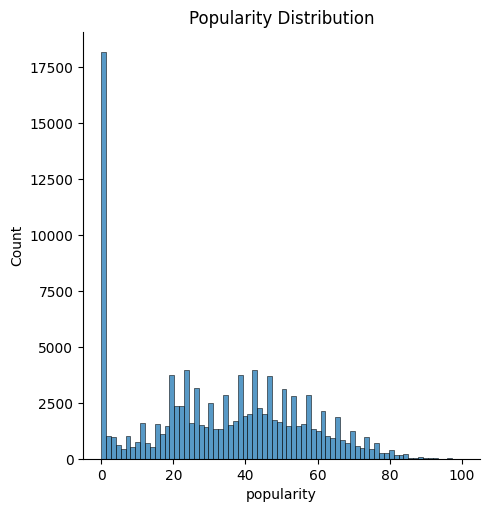

In [13]:

import seaborn as sns
sns.displot(df['popularity'])
plt.title('Popularity Distribution')


# Exploratory Data Analysis (EDA)

In [14]:
# Calculate mean of popularity score based on genres

pop_score_genre = df_final.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(10)

pop_genre_score = pop_score_genre.to_frame().reset_index()
# pop_genre_score


## Most Popular Genre [ TOP 10 ]

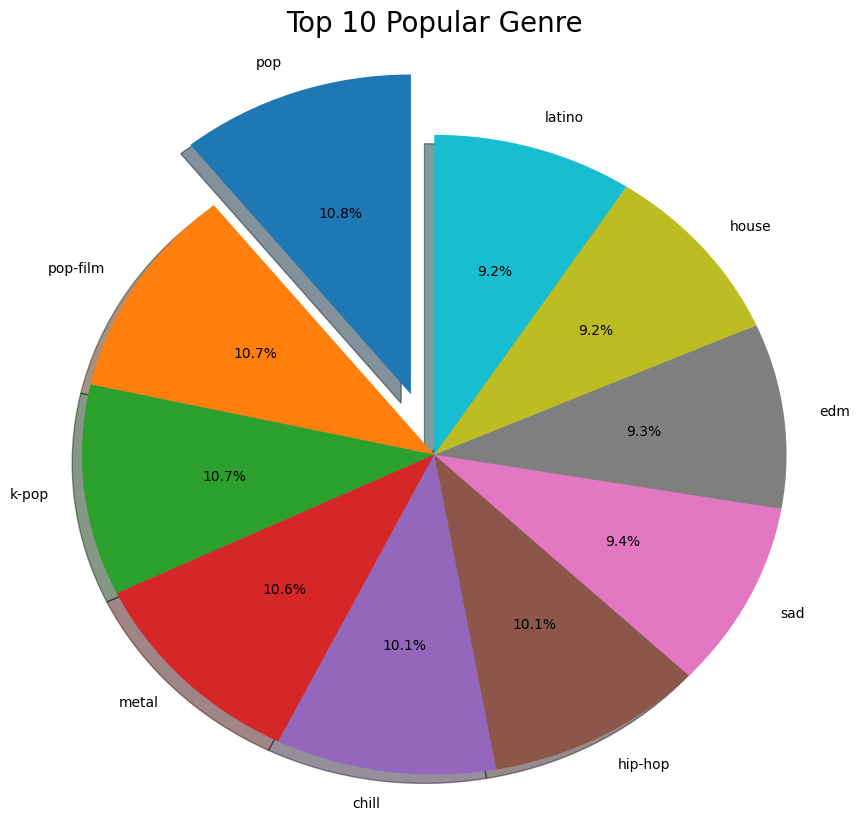

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

plt.figure(figsize=(10,10))
plt.pie(pop_genre_score['popularity'], labels=pop_genre_score.track_genre, 
        shadow=True, startangle=90, explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0], autopct='%1.1f%%')
plt.axis('auto') 
plt.title('Top 10 Popular Genre',fontsize = 20)
plt.show()

# Most Popular Artists [ TOP 10 ]

In [16]:
# df_final[df_final['artists'].str.contains('Petras')]
# df_final

<AxesSubplot: title={'center': 'Top 10 Popular Artists'}, xlabel='popularity', ylabel='artists'>

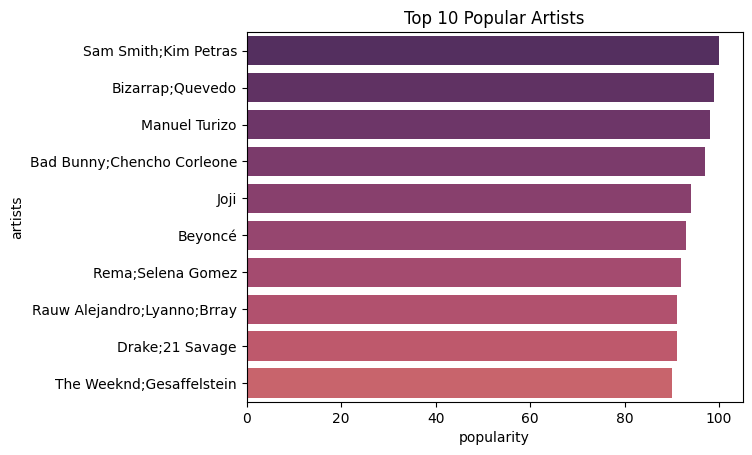

In [17]:
# Calculate mean of popularity score based on artists
import seaborn as sns
pop_score_artists = df_final.groupby('artists')['popularity'].mean().sort_values(ascending = False).head(10)
pop_score_artists = pop_score_artists.to_frame().reset_index()
palette = sns.color_palette("flare",n_colors=15)
palette.reverse()

plt.title('Top 10 Popular Artists')
sns.barplot(data=pop_score_artists, x="popularity", y="artists", palette=palette, orient = 'h')
# pop_score_artists

## Duration of Song in Top 30 Genres

Text(0, 0.5, 'Track Genre')

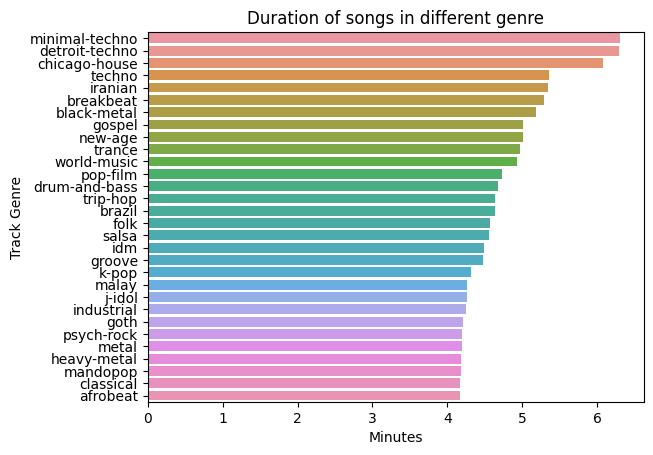

In [18]:
genre = df_final.groupby('track_genre')['duration_ms'].mean().sort_values(ascending = False).head(30)
genre = genre.to_frame().reset_index()
genre['duration_ms'] = genre['duration_ms']/1000/60
plt.title('Duration of songs in different genre')
fig = sns.barplot(y=genre['track_genre'], x=genre['duration_ms'], data=genre)
fig.set_xlabel("Minutes")
fig.set_ylabel("Track Genre")
# genre

## Most Popular Tracks [ TOP 10 ]

<AxesSubplot: title={'center': 'Top 10 Popular Tracks'}, xlabel='popularity', ylabel='track_name'>

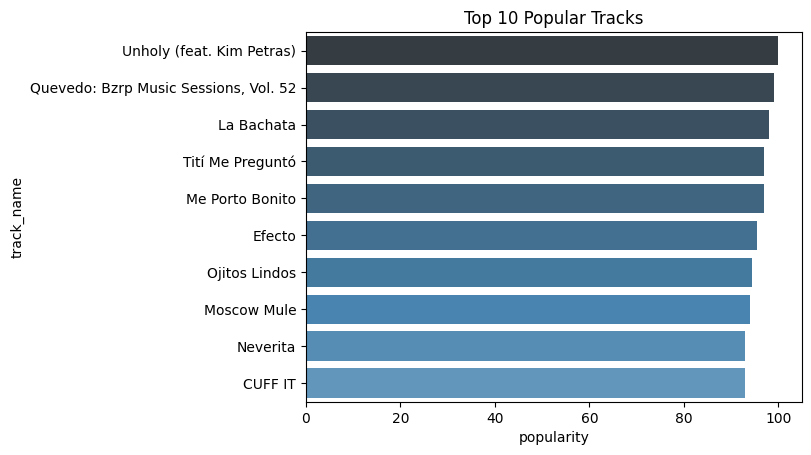

In [19]:
# Calculate mean of popularity score based on tracks

pop_score_track = df.groupby('track_name')['popularity'].mean().sort_values(ascending = False).head(10)
pop_score_track = pop_score_track.to_frame().reset_index()

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()
plt.title('Top 10 Popular Tracks')
sns.barplot(data=pop_score_track, x="popularity", y="track_name", palette=palette, orient = 'h')


# Word Cloud for Frequent Track Names

Let's find out what word is most frequent among all the track names.

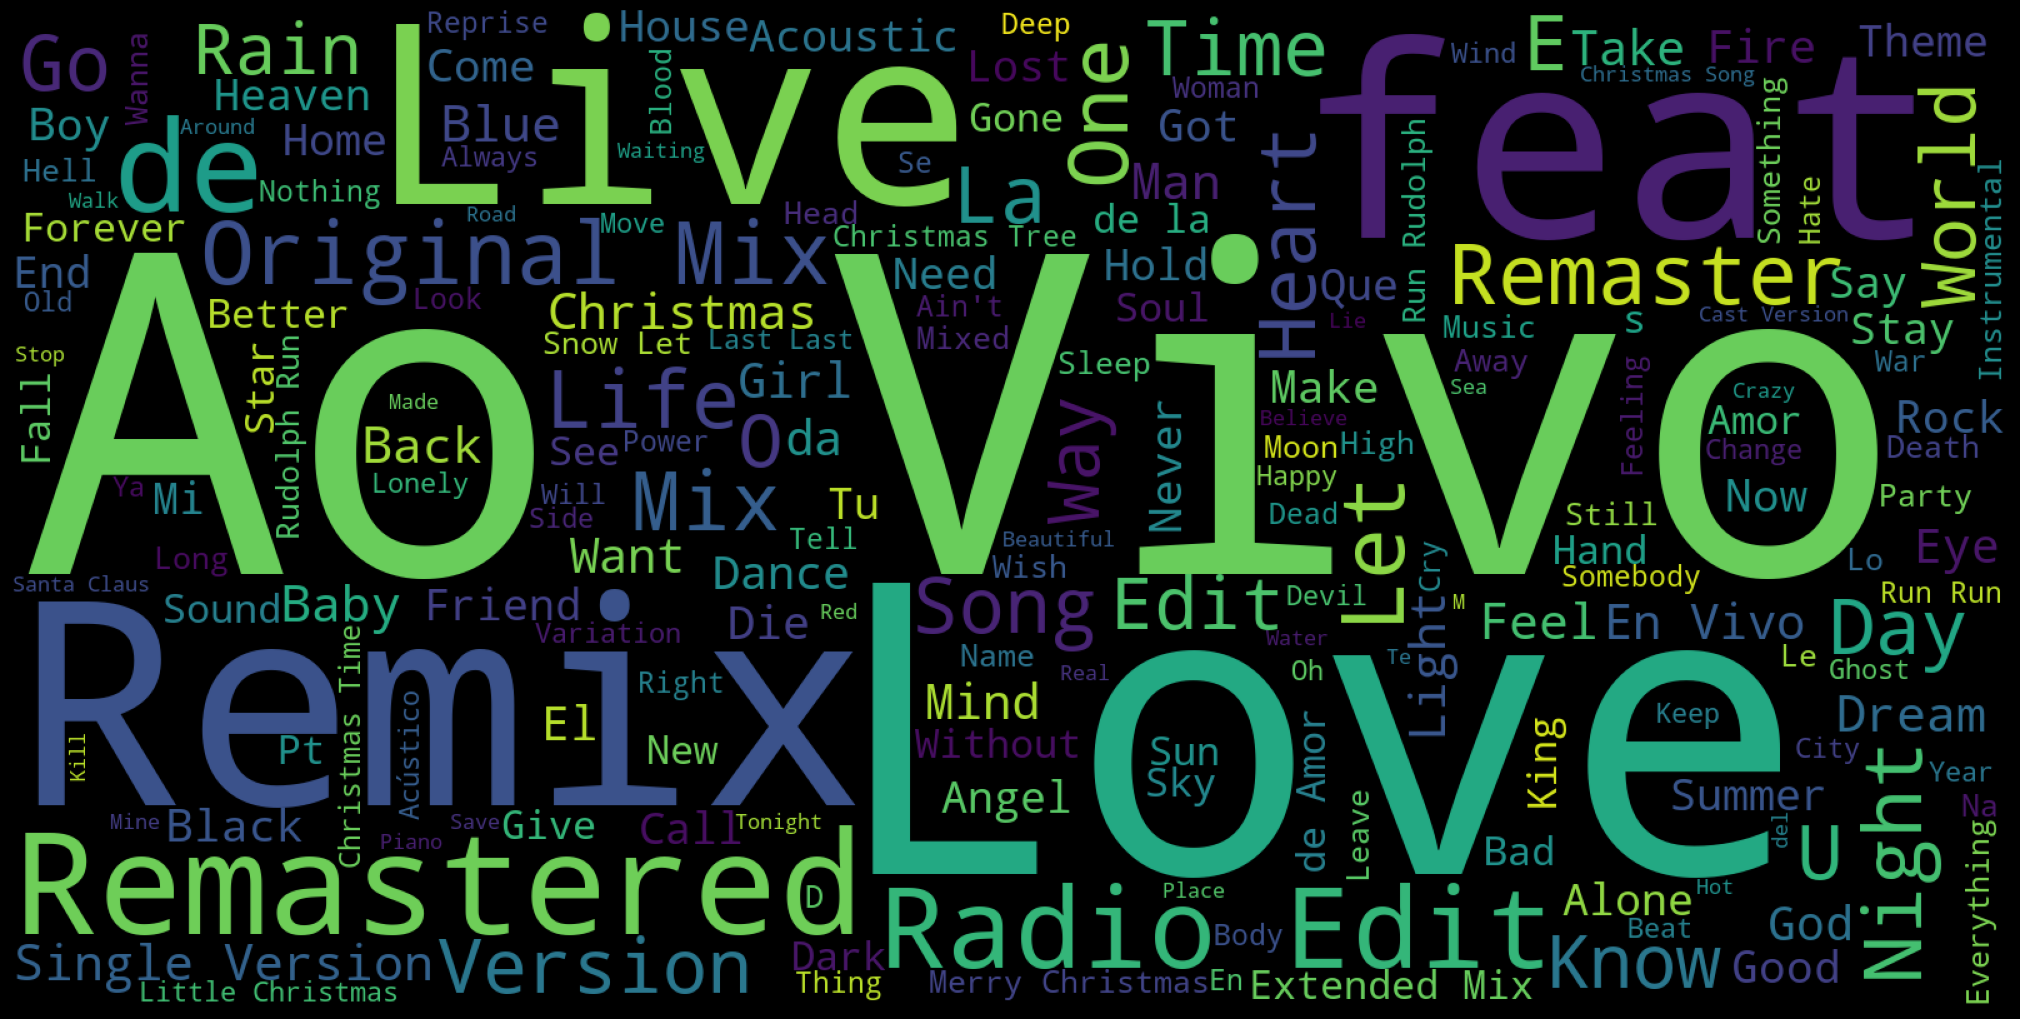

In [20]:
from wordcloud import WordCloud

track_names = " ".join(track for track in df.track_name)
track_names

wordcloud = WordCloud(width=1600, height=800).generate(track_names)

# Open a plot of the generated image.
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Word Cloud for Track Genre

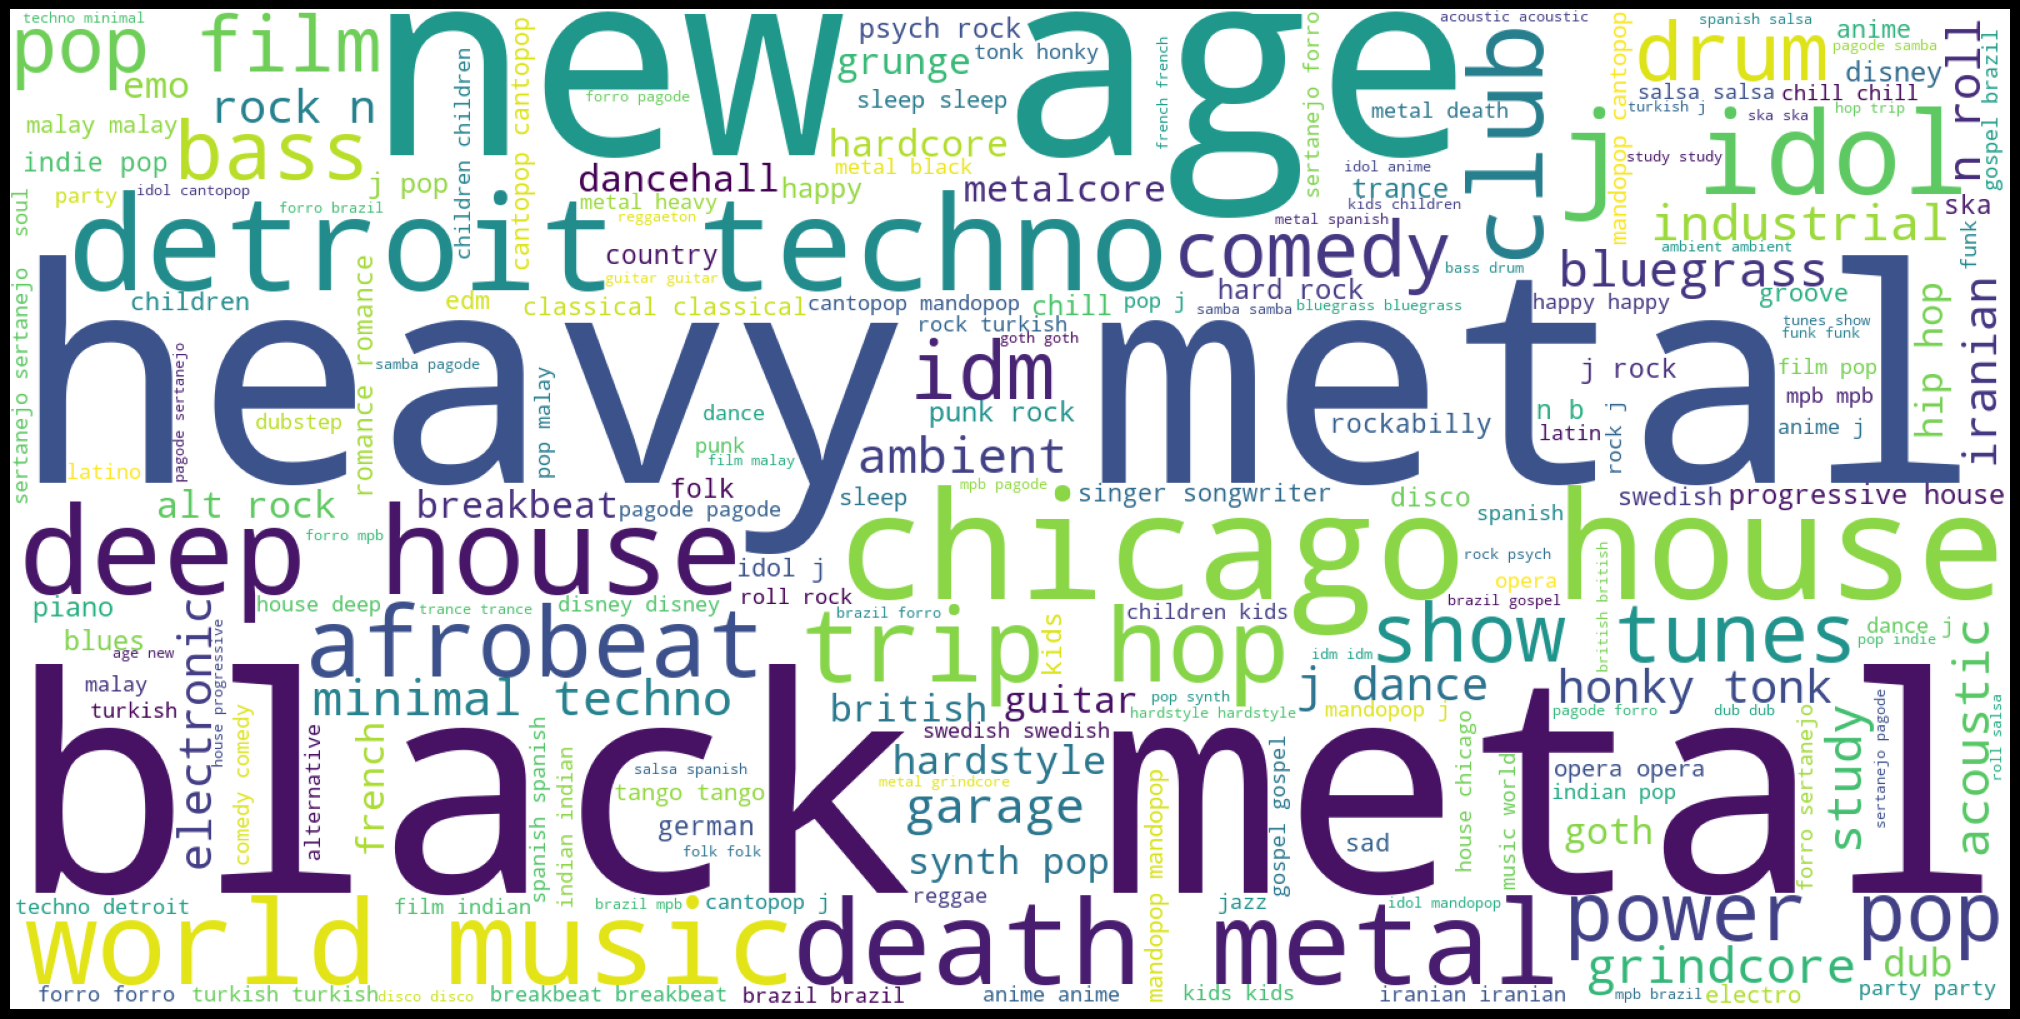

In [21]:
from wordcloud import WordCloud

track_genre = " ".join(genre for genre in df_final.track_genre)
wordcloud_genre = WordCloud(background_color='white',width=1600, height=800).generate(track_genre)

# Open a plot of the generated image.
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud_genre)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Further remove columns which are not numeric

In [22]:
df_final.head(3)
df_final = df_final.drop(columns = ['artists', 'track_genre'])
df_final

popularity  duration_ms  explicit  danceability  energy  key  \
36750           52       178533      True          0.82    0.61    1   
92751           39       151680     False          0.61    0.38    0   
66970           32        84305     False          0.55    0.81    3   
66996            8        86675     False          0.66    0.61    3   
101161           0       289133     False          0.11    0.06   10   
...            ...          ...       ...           ...     ...  ...   
65756           63       225785     False          0.40    0.17    9   
65859           65       202440     False          0.59    0.82    4   
75903           37       144533     False          0.50    0.14    1   
79554           37       228000     False          0.54    0.34    2   
76400           39       185666     False          0.36    0.52   10   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
36750      -7.77     1         0.25          0.17              0.00      0.11   
92751     -10.36     0         0.03          0.48              0.00      0.11   
66970      -5.54     1         0.06          0.13              0.00      0.08   
66996      -8.69     1         0.09          0.12              0.00      0.04   
101161    -28.05     1         0.06          0.99              0.70      0.11   
...          ...   ...          ...           ...               ...       ...   
65756     -10.68     1         0.03          0.88              0.00      0.10   
65859      -3.53     1         0.07          0.17              0.00      0.13   
75903     -18.71     1         0.07          0.98              0.92      0.12   
79554     -16.09     1         0.05          0.98              0.93      0.15   
76400      -6.96     0         0.03          0.71              0.00      0.12   

        valence  tempo  time_signature  
36750      0.69 142.96               4  
92751      0.92 110.72               4  
66970      0.87 118.37               4  
66996      0.76 118.44               4  
101161     0.04 169.40               1  
...         ...    ...             ...  
65756      0.13 134.71               4  
65859      0.57 108.11               4  
75903      0.06 148.79               4  
79554      0.44 159.95               4  
76400      0.31  94.71               4  

[76962 rows x 15 columns]

In [64]:

# df_final = df_final.loc[df_final['popularity'] != 0]
df_final.shape

(76962, 15)

# Correlation Between Data Points

In [65]:
df_final.describe()

popularity   duration_ms  danceability        energy           key  \
count  76962.000000  7.696200e+04  76962.000000  76962.000000  76962.000000   
mean      34.657662  2.320284e+05      0.557802      0.633758      5.289429   
std       18.925147  1.184393e+05      0.178511      0.259836      3.557599   
min        0.000000  8.586000e+03      0.000000      0.000000      0.000000   
25%       21.000000  1.736695e+05      0.444000      0.453000      2.000000   
50%       35.000000  2.155095e+05      0.572000      0.676000      5.000000   
75%       49.000000  2.683535e+05      0.689000      0.857000      8.000000   
max      100.000000  5.237295e+06      0.985000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  76962.000000  76962.000000  76962.000000  76962.000000   
mean      -8.653918      0.631026      0.089834      0.332265   
std        5.356535      0.482530      0.118581      0.341102   
min      -49.531000      0.000000      0.000000      0.000000   
25%      -10.520000      0.000000      0.036100      0.015900   
50%       -7.302000      1.000000      0.049200      0.195000   
75%       -5.167000      1.000000      0.087700      0.636000   
max        4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      76962.000000  76962.000000  76962.000000  76962.000000   
mean           0.189786      0.220693      0.460740    122.082955   
std            0.335029      0.199505      0.263805     30.156112   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098700      0.238000     99.198500   
50%            0.000102      0.133000      0.445000    122.020000   
75%            0.184000      0.284000      0.673000    140.113000   
max            1.000000      1.000000      0.995000    243.372000   

       time_signature  
count     76962.00000  
mean          3.89578  
std           0.45887  
min           0.00000  
25%           4.00000  
50%           4.00000  
75%           4.00000  
max           5.00000

In [66]:
df_final.corr()

popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.057427  0.065201      0.094782 -0.001107   
duration_ms        -0.057427     1.000000 -0.066517     -0.059283  0.056304   
explicit            0.065201    -0.066517  1.000000      0.110153  0.103840   
danceability        0.094782    -0.059283  0.110153      1.000000  0.134132   
energy             -0.001107     0.056304  0.103840      0.134132  1.000000   
key                 0.004725     0.011109  0.001179      0.033771  0.042129   
loudness            0.095002     0.001981  0.107145      0.265962  0.761852   
mode               -0.003384    -0.034550 -0.025842     -0.058869 -0.067811   
speechiness        -0.069412    -0.063329  0.342148      0.108673  0.141166   
acousticness       -0.032906    -0.104746 -0.082914     -0.167074 -0.730693   
instrumentalness   -0.184725     0.107073 -0.118108     -0.193161 -0.188533   
liveness           -0.033237     0.005926  0.048487     -0.131718  0.192358   
valence             0.017610    -0.139271  0.000887      0.493126  0.253917   
tempo               0.000464     0.022904 -0.005484     -0.011748  0.261762   
time_signature      0.041471     0.019833  0.036507      0.205596  0.178028   

                       key  loudness      mode  speechiness  acousticness  \
popularity        0.004725  0.095002 -0.003384    -0.069412     -0.032906   
duration_ms       0.011109  0.001981 -0.034550    -0.063329     -0.104746   
explicit          0.001179  0.107145 -0.025842     0.342148     -0.082914   
danceability      0.033771  0.265962 -0.058869     0.108673     -0.167074   
energy            0.042129  0.761852 -0.067811     0.141166     -0.730693   
key               1.000000  0.034455 -0.143361     0.012340     -0.041206   
loudness          0.034455  1.000000 -0.035104     0.054164     -0.581924   
mode             -0.143361 -0.035104  1.000000    -0.033573      0.082342   
speechiness       0.012340  0.054164 -0.033573     1.000000      0.014670   
acousticness     -0.041206 -0.581924  0.082342     0.014670      1.000000   
instrumentalness -0.003836 -0.434613 -0.050325    -0.110621      0.094868   
liveness         -0.004208  0.080992  0.018855     0.236826     -0.015671   
valence           0.024468  0.292685  0.024584     0.035821     -0.101816   
tempo             0.005533  0.235693 -0.000749    -0.005388     -0.225481   
time_signature    0.015907  0.192979 -0.023857    -0.013011     -0.174199   

                  instrumentalness  liveness   valence     tempo  \
popularity               -0.184725 -0.033237  0.017610  0.000464   
duration_ms               0.107073  0.005926 -0.139271  0.022904   
explicit                 -0.118108  0.048487  0.000887 -0.005484   
danceability             -0.193161 -0.131718  0.493126 -0.011748   
energy                   -0.188533  0.192358  0.253917  0.261762   
key                      -0.003836 -0.004208  0.024468  0.005533   
loudness                 -0.434613  0.080992  0.292685  0.235693   
mode                     -0.050325  0.018855  0.024584 -0.000749   
speechiness              -0.110621  0.236826  0.035821 -0.005388   
acousticness              0.094868 -0.015671 -0.101816 -0.225481   
instrumentalness          1.000000 -0.100093 -0.334141 -0.059636   
liveness                 -0.100093  1.000000  0.015012 -0.009151   
valence                  -0.334141  0.015012  1.000000  0.095063   
tempo                    -0.059636 -0.009151  0.095063  1.000000   
time_signature           -0.082397 -0.031864  0.131347  0.085997   

                  time_signature  
popularity              0.041471  
duration_ms             0.019833  
explicit                0.036507  
danceability            0.205596  
energy                  0.178028  
key                     0.015907  
loudness                0.192979  
mode                   -0.023857  
speechiness            -0.013011  
acousticness           -0.174199  
instrumentalness       -0.082397  
liveness   

<AxesSubplot: >

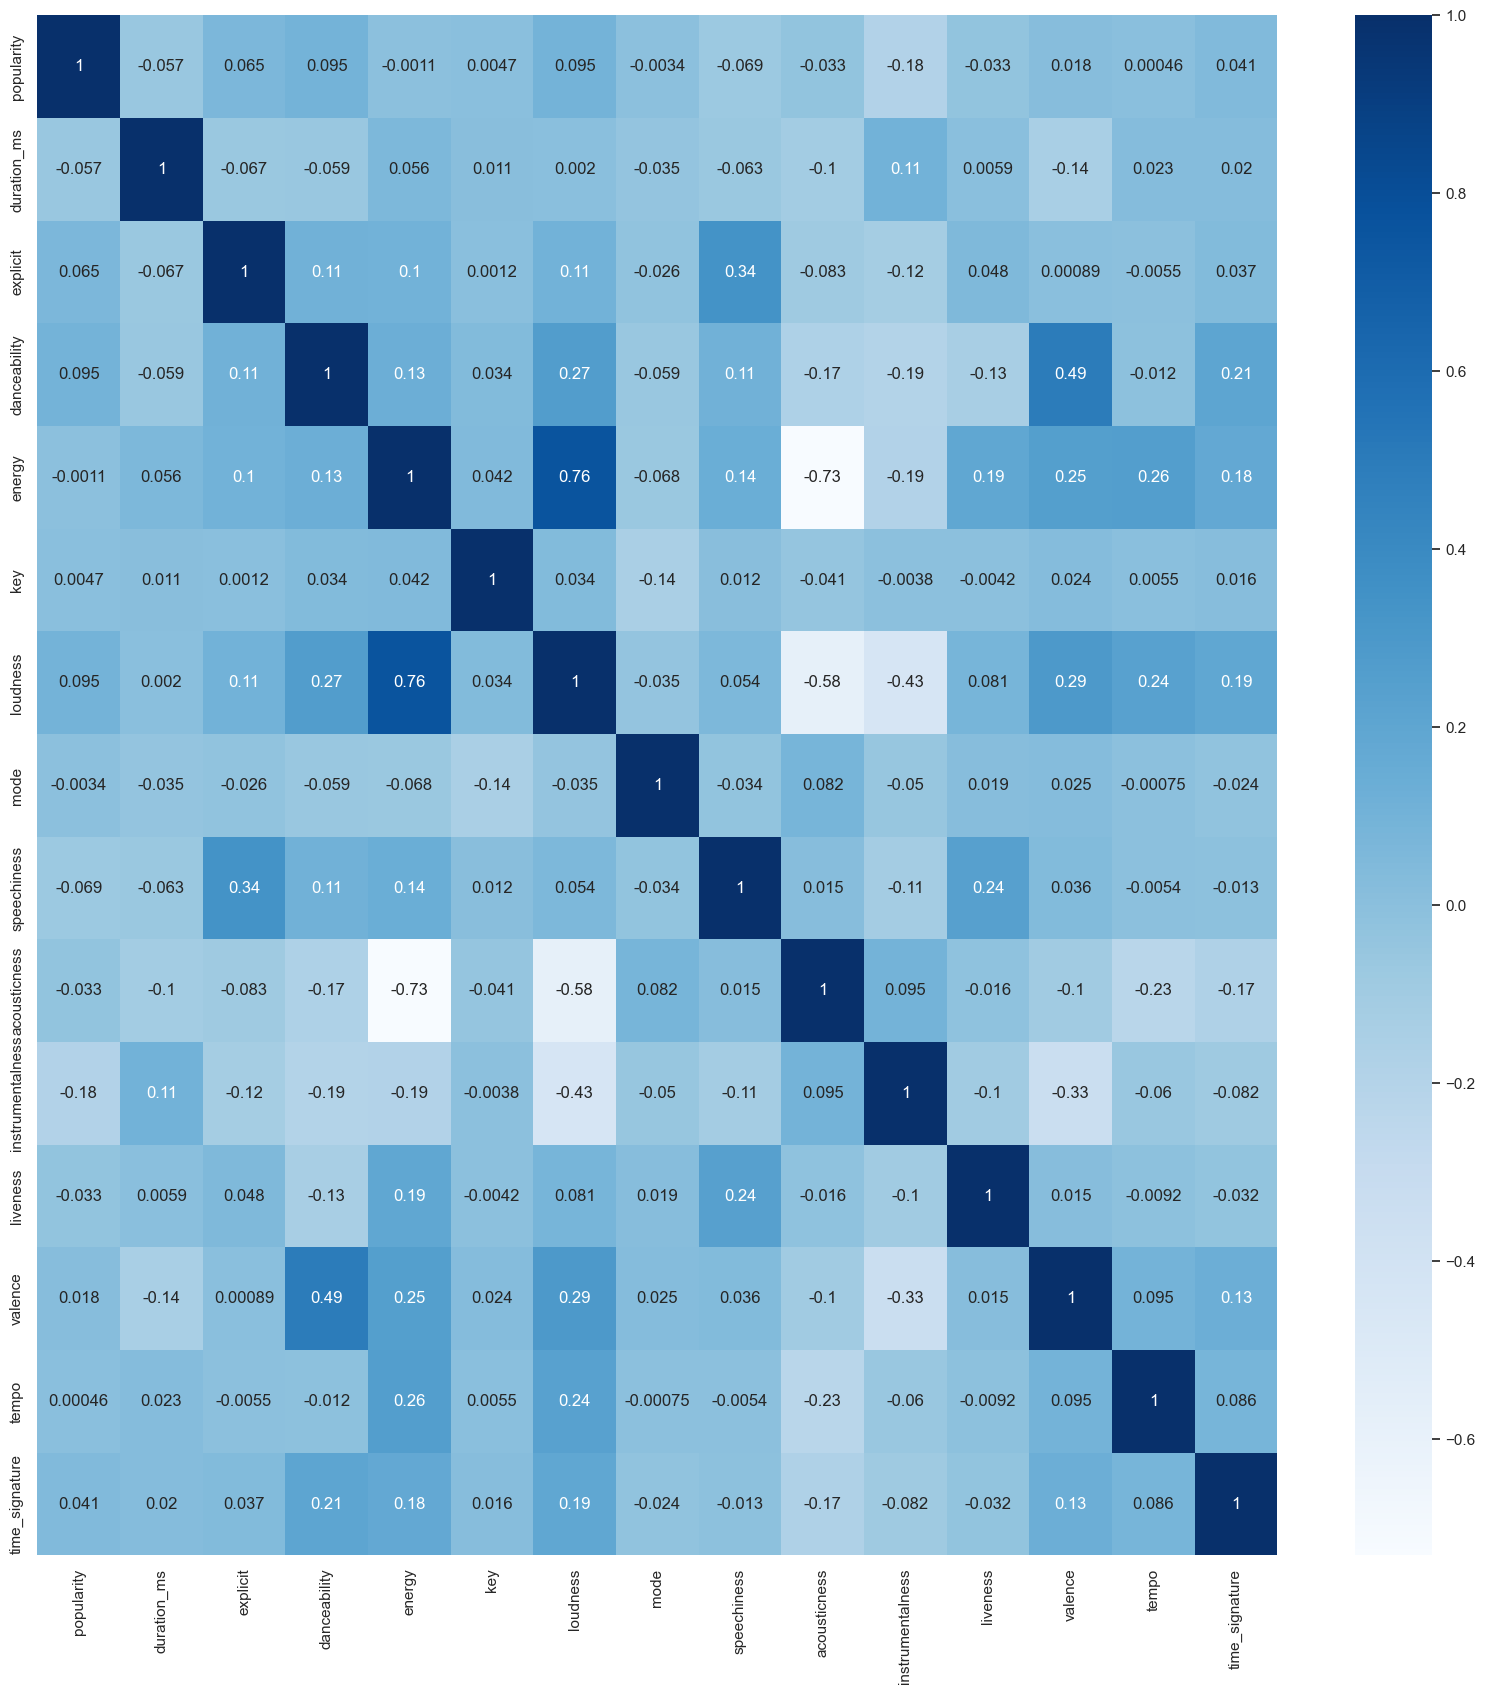

In [67]:

plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(), annot=True, cmap="Blues")


As we can see from the correlations that energy and loudness are positvely correlated with each other because it makes sense for loud music to be energetic. Similarly, valence is also correlated with danceability because valence represents songs which are happy and cheerful.

Whereas, acoustic is negatively correlated with energy and loudness because acousitcness songs represent characteristics with quietness and careful, calm listening.

<AxesSubplot: xlabel='loudness', ylabel='energy'>

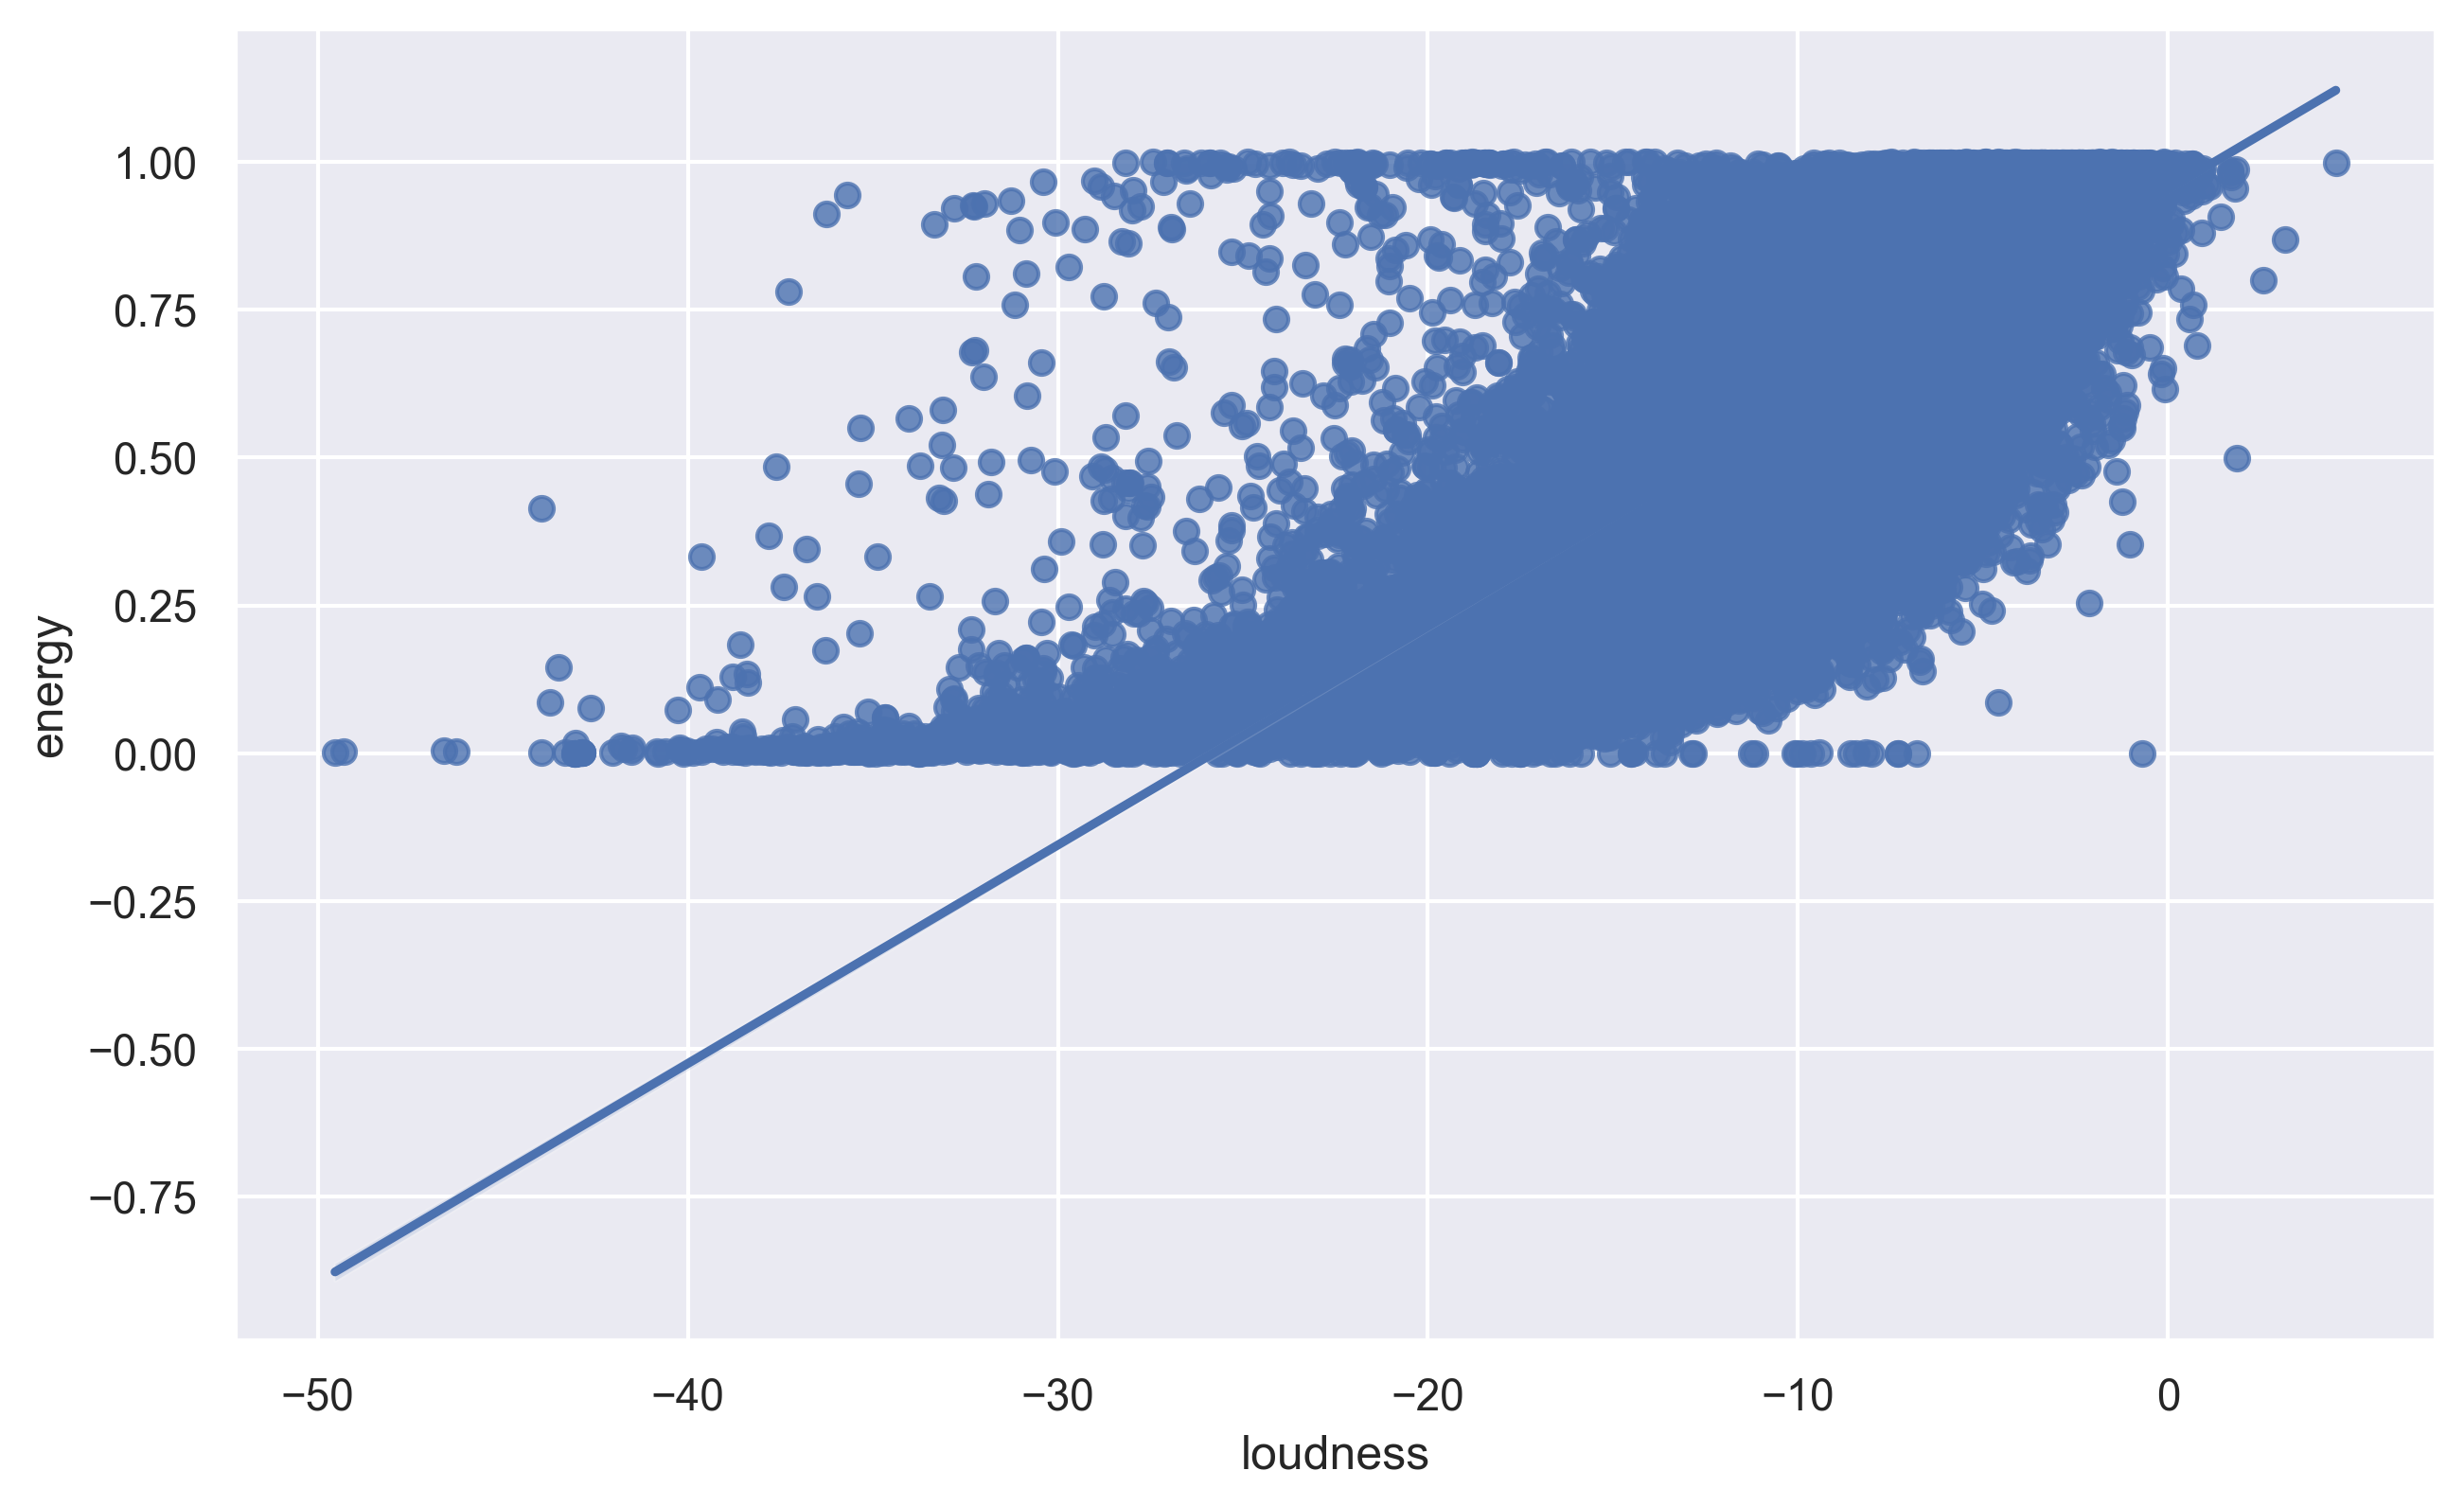

In [68]:
sns.set()
plt.figure(figsize=(10, 6), dpi=300)
sns.regplot(x='loudness', y='energy', data=df_final)

<AxesSubplot: xlabel='loudness', ylabel='popularity'>

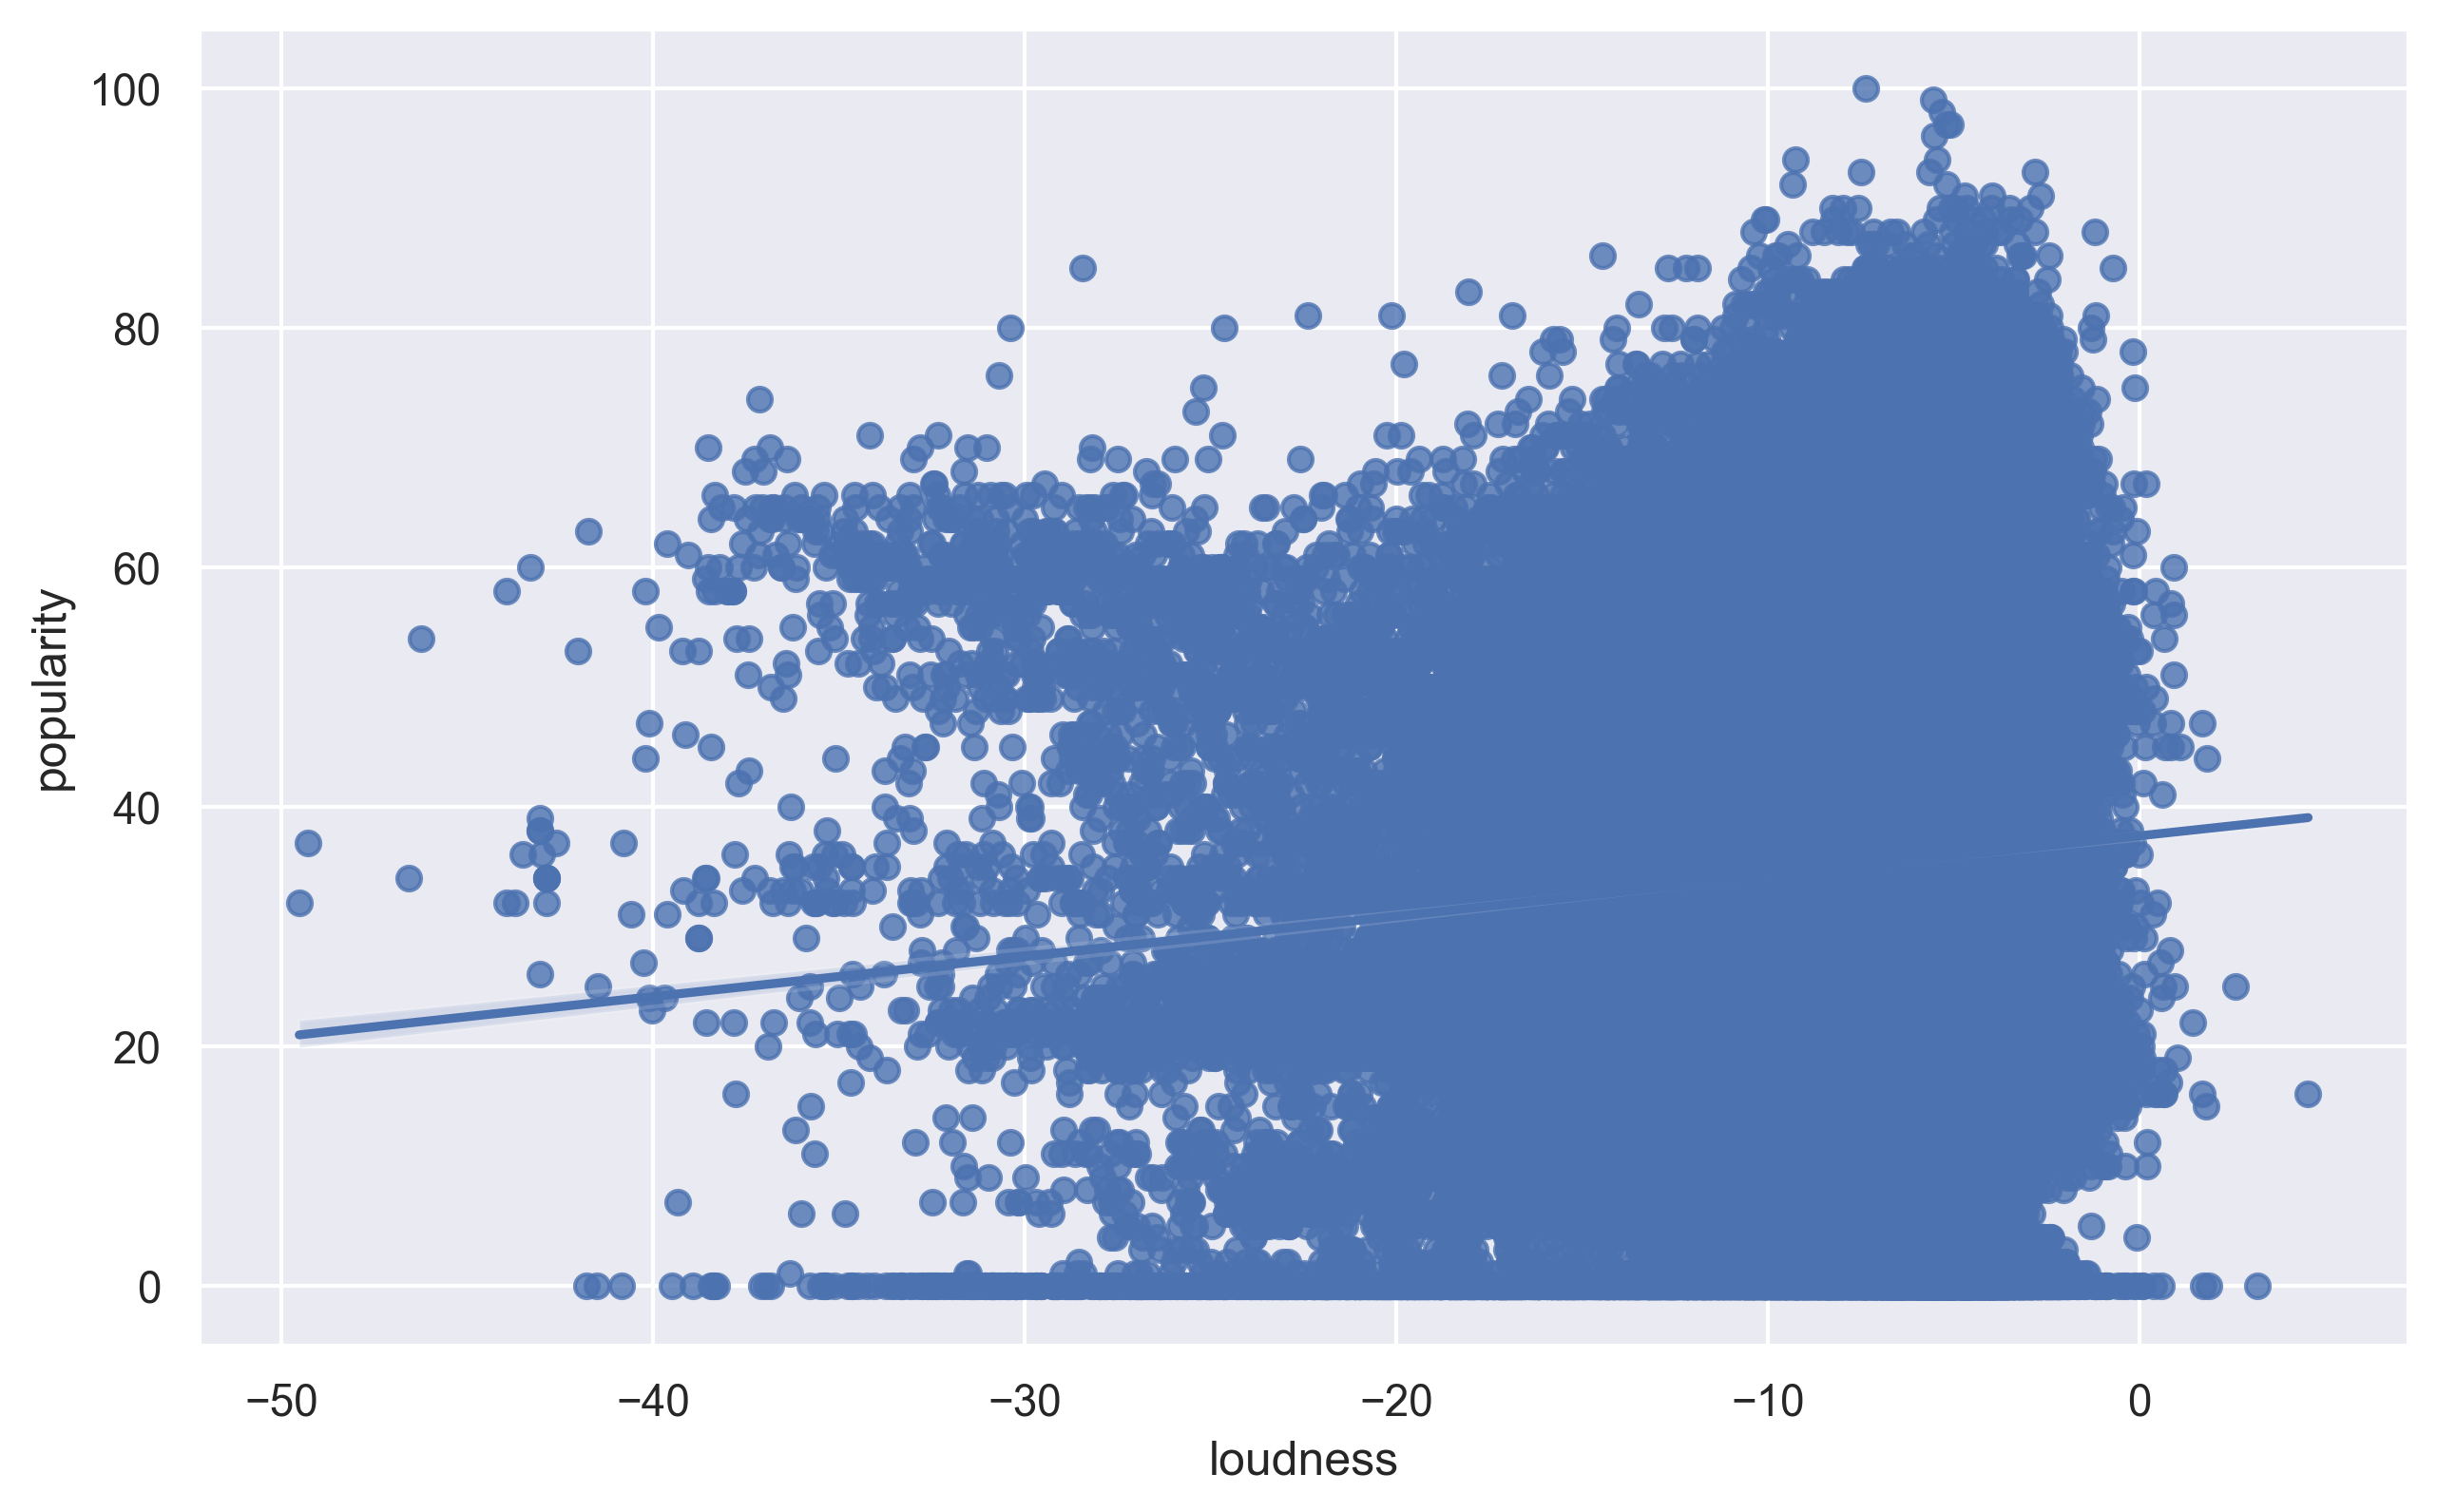

In [69]:
sns.set()
plt.figure(figsize=(10, 6), dpi=300)
sns.regplot(x='loudness', y='popularity', data=df_final)


Here, we can see that the more the loud music, the more popular it can be.

In [40]:
# Filtering top 10 indian songs
indian = df[df['track_genre'].str.contains("indian")]
top20_indian = indian.sort_values(by='popularity', ascending=False)[:10]
top20_indian[['artists', 'album_name', 'track_name', 'popularity']]

artists  \
55001           Pritam;Arijit Singh;Amitabh Bhattacharya   
55008  Pritam;Arijit Singh;Amitabh Bhattacharya;Jonit...   
55031             Jasleen Royal;B Praak;Romy;Anvita Dutt   
55016                                          Anuv Jain   
55030                                Pritam;Arijit Singh   
55017                           Kanishk Seth;Kavita Seth   
55007                               Pritam;Mohit Chauhan   
55032           Pritam;Arijit Singh;Amitabh Bhattacharya   
55011                 Pritam;Shreya Ghoshal;TUSHAR JOSHI   
55015                                Pritam;Arijit Singh   

                                              album_name  \
55001                       Kesariya (From "Brahmastra")   
55008                      Deva Deva (From "Brahmastra")   
55031                          Ranjha (From "Shershaah")   
55016                                         Baarishein   
55030                                         Chhichhore   
55017                   Rangisari (From "Jugjugg Jeeyo")   
55007                                         Jab We Met   
55032                 Dance Ka Bhoot (From "Brahmastra")   
55011                         Rasiya (From "Brahmastra")   
55015  Love Aaj Kal (Original Motion Picture Soundtrack)   

                               track_name  popularity  
55001        Kesariya (From "Brahmastra")          88  
55008       Deva Deva (From "Brahmastra")          79  
55031           Ranjha (From "Shershaah")          77  
55016                          Baarishein          76  
55030                           Khairiyat          75  
55017    Rangisari (From "Jugjugg Jeeyo")          75  
55007                           Tum Se Hi          74  
55032  Dance Ka Bhoot (From "Brahmastra")          74  
55011          Rasiya (From "Brahmastra")          74  
55015                              Shayad          74

### There are 114 different track genres present in the dataset

In [41]:
df['track_genre'].nunique()

114

Since there are 114 unique different track genres, we should move ahead with removing track genre column as well.

In [42]:
# All genres
all_genres = df['track_genre'].unique().tolist()
", ".join(all_genres)

'acoustic, afrobeat, alt-rock, alternative, ambient, anime, black-metal, bluegrass, blues, brazil, breakbeat, british, cantopop, chicago-house, children, chill, classical, club, comedy, country, dance, dancehall, death-metal, deep-house, detroit-techno, disco, disney, drum-and-bass, dub, dubstep, edm, electro, electronic, emo, folk, forro, french, funk, garage, german, gospel, goth, grindcore, groove, grunge, guitar, happy, hard-rock, hardcore, hardstyle, heavy-metal, hip-hop, honky-tonk, house, idm, indian, indie-pop, indie, industrial, iranian, j-dance, j-idol, j-pop, j-rock, jazz, k-pop, kids, latin, latino, malay, mandopop, metal, metalcore, minimal-techno, mpb, new-age, opera, pagode, party, piano, pop-film, pop, power-pop, progressive-house, psych-rock, punk-rock, punk, r-n-b, reggae, reggaeton, rock-n-roll, rock, rockabilly, romance, sad, salsa, samba, sertanejo, show-tunes, singer-songwriter, ska, sleep, songwriter, soul, spanish, study, swedish, synth-pop, tango, techno, tranc

In [43]:
# df_final = df_final.drop(columns = ['track_genre'])
# df_final

### Convert explicit boolean to int

In [ ]:
df_final['explicit'] = df_final.explicit.apply(lambda x: 1 if x else 0)
df_final

---

## Modelling

### Split the Dataset into Training and Test Sets

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['popularity'])
# X = df_final[['loudness', 'acousticness', 'instrumentalness', 'energy', 'speechiness']]
y = df_final['popularity']

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)
X

## Important features


In [ ]:
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)


In [ ]:
# using top 3 features
X = df_final[['acousticness', 'speechiness', 'loudness', 'energy', 'instrumentalness']]
y = df_final['popularity']

## Scale the features (MinMaxScaler)


In [ ]:
# minmax (values should be between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
minmax = mm.fit_transform(X)

feature_mm = pd.DataFrame(minmax, index=X.index,
                         columns=X.columns)
feature_mm = feature_mm.reset_index(drop=True)
feature_mm

In [ ]:
# Build the model
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(feature_mm, y, test_size=0.2, random_state=42)


In [ ]:

# from lazypredict.Supervised import LazyRegressor
# reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
# models_reg, predictions_reg = reg.fit(x_train_mm, x_test_mm, y_train_mm, y_test_mm)
# models_reg


### Applying Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Build the model
model_lr =  LinearRegression()   # create linear regression object
model_lr.fit(x_train_mm, y_train_mm)  # fit the model using the Training Data
predictions = model_lr.predict(x_test_mm)

In [ ]:
train_output = pd.DataFrame({'Actual': y_test_mm, 'Predicted': predictions})
train_output

### Calculating Performance metrics

In [ ]:
print("R^2 in Training Set:", model_lr.score(x_train_mm, y_train_mm))
print("R^2 in Test Set:", model_lr.score(x_test_mm, y_test_mm))
rmse = mean_squared_error(y_test_mm, predictions)**0.5
print ('RMSE: ', rmse)

In [ ]:
# Plot the prediction vs actual

actual_values = y_test_mm
plt.scatter(predictions, actual_values, alpha=0.7, color='teal')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.title("Linear Regression Model ~ Predicted vs Actual")
plt.show()

In [ ]:

# x_ax = range(len(predictions))
# plt.scatter(x_ax, y_test_mm, s=0.1, color="blue", label="original")
# plt.plot(x_ax, predictions, lw=0.2, color="red", label="predicted")
# plt.legend()
# plt.show()


### Regression Modeling and Evaluation

In [ ]:
from xgboost import XGBRegressor
from sklearn import linear_model, tree
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [ ]:
XGBreg = XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1)
ridge_model = linear_model.Ridge(alpha=.5)
lasso_model = linear_model.Lasso(alpha =.1)
dtr = tree.DecisionTreeRegressor()
bayridge_model = linear_model.BayesianRidge()
poly_list = [PolynomialFeatures(degree=i, include_bias=False) for i in range(2,8)]
prm_list = [linear_model.LinearRegression() for i in range(2,8)]

In [ ]:
from datetime import datetime
def model_metrics(model, X_test, y_test, decimals = 5, X_train = x_train_mm, y_train = y_train_mm):
    start  = datetime.now()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2, 'time': (datetime.now() - start).seconds}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

results = pd.DataFrame(
    [
        model_metrics(ridge_model, x_test_mm, y_test_mm),
        model_metrics(lasso_model, x_test_mm, y_test_mm),
        model_metrics(XGBreg, x_test_mm, y_test_mm),
        model_metrics(dtr, x_test_mm, y_test_mm),
        model_metrics(bayridge_model, x_test_mm, y_test_mm),
    ], 
    index = ['XGBRegressor', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'BayesianRidge']) \
.reset_index() \
.rename(columns={'index':'model'})


In [ ]:
results = results[results['R-Squared'] >= 0] # decision tree is removed here
results = results.sort_values('R-Squared', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['R-Squared'], palette=palette).set_title('Model Performance based on R-Squared')


In [ ]:
results.sort_values(['mean_squared_error', 'R-Squared', 'time'],
              ascending = [True, False, True])


We can see that even the well performing model, Lasso has relatively very low R-squared which suggests that even though some of the data points are correlated with popularity but can be problematic to precisely predict the value of popularity based on these correlated data points and from above R2 squared.

### Classifier Models

In [36]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN
from xgboost import XGBClassifier #XGB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from statistics import mean
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

df_final['is_popular'] = df_final['popularity'].apply(lambda x: 1 if x > 50 else 0)

y = df_final['is_popular']
X = df_final.drop(columns=['popularity', 'explicit', 'key', 'mode', 'time_signature', 'is_popular', 'duration_ms', 'liveness', 'valence', 'tempo', 'danceability'])
minmax = mm.fit_transform(X)

feature_mm = pd.DataFrame(minmax, index=X.index,
                         columns=X.columns)
feature_mm = feature_mm.reset_index(drop=True)

# Build the model
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(feature_mm, y, test_size=0.2, random_state=42)
X

energy  loudness  speechiness  acousticness  instrumentalness
36750     0.61     -7.77         0.25          0.17              0.00
92751     0.38    -10.36         0.03          0.48              0.00
66970     0.81     -5.54         0.06          0.13              0.00
66996     0.61     -8.69         0.09          0.12              0.00
101161    0.06    -28.05         0.06          0.99              0.70
...        ...       ...          ...           ...               ...
65756     0.17    -10.68         0.03          0.88              0.00
65859     0.82     -3.53         0.07          0.17              0.00
75903     0.14    -18.71         0.07          0.98              0.92
79554     0.34    -16.09         0.05          0.98              0.93
76400     0.52     -6.96         0.03          0.71              0.00

[76962 rows x 5 columns]

## Running Lazypredict

In [73]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(x_train_mm, x_test_mm, y_train_mm, y_test_mm)
# models

In [37]:
dt_knn = KNeighborsClassifier(12)
dt_knn.fit(x_train_mm, y_train_mm)
y_pred = dt_knn.predict(x_test_mm)
print(accuracy_score(y_test_mm, y_pred))

0.7712596634834016


In [40]:
#3. Fit the model into the training set


names = ["Naive Bayes", "KNN", "Decision Tree", "Random Forest", "Ada BOOST", "XGBOOST"]

# List the variable to hold classification scores

scores = []

clfs = [
    GaussianNB(),
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth = 5),
     RandomForestClassifier(n_estimators = 500, max_depth = 5, max_leaf_nodes = 8),
     AdaBoostClassifier(),
     XGBClassifier(use_label_encoder=False)
    
]

pipes = []

kfold = KFold(n_splits = 2)


for clf in clfs:
    pipe = Pipeline(steps = [('classifier', clf)])

    print(cross_val_score(pipe, x_train_mm, y_train_mm, cv = kfold ))
   
    score=mean(cross_val_score(pipe, x_train_mm, y_train_mm, cv = kfold ))
    
    pipes.append(pipe)
    print(clf)
    
    scores.append(score)
    print("Model Score: %.3f" % (score * 100))
    print("\n--------------------------------------------------------------")
    

[0.779503   0.77627989]
GaussianNB()
Model Score: 77.789

--------------------------------------------------------------
[0.74143252 0.74191138]
KNeighborsClassifier()
Model Score: 74.167

--------------------------------------------------------------
[0.78161442 0.77793659]
DecisionTreeClassifier(max_depth=5)
Model Score: 77.978

--------------------------------------------------------------
[0.78054247 0.77783914]
RandomForestClassifier(max_depth=5, max_leaf_nodes=8, n_estimators=500)
Model Score: 77.919

--------------------------------------------------------------
[0.7796979  0.77605249]
AdaBoostClassifier()
Model Score: 77.788

--------------------------------------------------------------
[0.77839857 0.77455821]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
      

As we can see that we got higher score in classifier modeling from KNNClassifier above: 77

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_mm, y_pred)
print(confusion_matrix)


[[11697   289]
 [ 3232   175]]


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

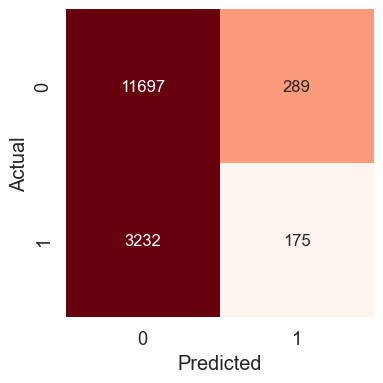

In [44]:
# Generate a seaborn heatmap for the confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test_mm, y_pred)
df_cm = pd.DataFrame(data, columns = np.unique(y_test_mm), index = np.unique(y_test_mm))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)   #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size


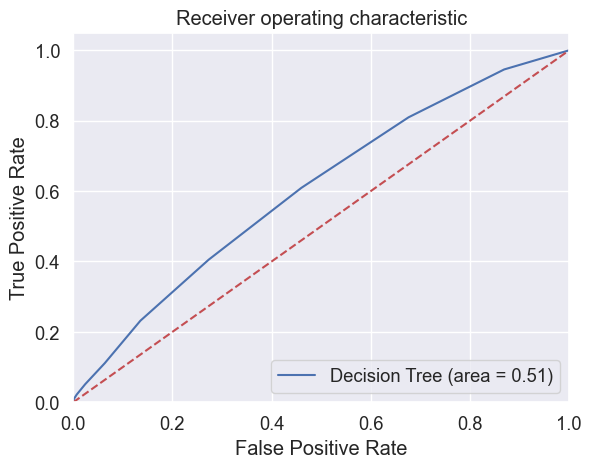

In [49]:
# Generate the ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test_mm, dt_knn.predict(x_test_mm))
fpr, tpr, thresholds = roc_curve(y_test_mm, dt_knn.predict_proba(x_test_mm)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc ="lower right")
plt.show()


# Display Classification Report


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test_mm, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     11986
           1       0.38      0.05      0.09      3407

    accuracy                           0.77     15393
   macro avg       0.58      0.51      0.48     15393
weighted avg       0.69      0.77      0.70     15393



# Out of Sample Predictions

In [64]:


# Predict whether based on following song feature, it will be popular or not with the selected model

d = {
    'energy':[0.826, 0.8575, 0.6544, 0.7484],
    'loudness': [-5.487, -8.318, -1.888, -6.444],
    'speechiness': [0.03, 0.401, 0.297, 0.072],
    'acousticness': [0.02, 0.93, 0.74, 0.445],     
    'instrumentalness': [0.0004, 0.001, 0.828, 0.974]
}

new_df=pd.DataFrame(data=d)
new_df

energy  loudness  speechiness  acousticness  instrumentalness
0    0.83     -5.49         0.03          0.02              0.00
1    0.86     -8.32         0.40          0.93              0.00
2    0.65     -1.89         0.30          0.74              0.83
3    0.75     -6.44         0.07          0.45              0.97

In [70]:
y_pred = dt_knn.predict(new_df)

In [71]:
pred_prob_y = dt_knn.predict_proba(new_df)

In [72]:
def display_predicted_class(y_pred):
    label =''
    if y_pred == 1:
        label = '"yes"'
    else:
        label = '"no"'   
    print('Predicted value for popularity : ', y_pred,', which means ', label)  
    
def display_predicted_probability(y_pred, pred_prob):
    prob_label = ''
    prob = 0
    if y_pred == 1:
        prob_label = '", which mean the probability of yes is : '
        prob = pred_prob[1]
     
    else:
        prob_label = '", which mean the probability of no is: '
        prob = pred_prob[0]

    print('Predicted probability is %.3f' % prob)

for i in range(new_df.shape[0]):    
    display_predicted_class(y_pred[i])
    display_predicted_probability(y_pred[i], pred_prob_y[i])



Predicted value for popularity :  1 , which means  "yes"
Predicted probability is 0.083
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.833
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.750
Predicted value for popularity :  0 , which means  "no"
Predicted probability is 0.750


From the analysis, it seems that in order for a song to be popular is quite hard and not every feature of song can be easily matched to make a song popular.